In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [48]:
cofactorsmapped = pd.read_csv("data/cofactors_mapped_combined.csv").drop("Unnamed: 0", axis = 1)
mediator = cofactorsmapped[cofactorsmapped["Complex"] == "Mediator"].set_index("Bgee")
mediator["Subcomplex or Module"] = mediator["Subcomplex or Module"].apply(lambda x: x.replace("]", "").replace("[", "").split(", "))
mediator.head()

,Gene Name,Complex,Subcomplex or Module,Own-complex paralog,Other-complex Paralogues,Notes,Source,UniprotID,Entry Name,Protein names,Gene Names,Sequence,Ensembl,GeneID,PDB,Primary Gene Name
Bgee,,,,,,,,,,,,,,,,
ENSG00000133997,MED6,Mediator,[Head],NaN,NaN,NaN,Malik and Roeder (2023),O75586,MED6_HUMAN,Mediator of RNA polymerase II transcription su...,MED6 ARC33,MAAVDIRDNLLGISWVDSSWIPILNSGSVLDYFSERSNPFYDRTCN...,ENST00000256379.10 [O75586-1];ENST00000430055....,10001.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED6
ENSG00000159479,MED8,Mediator,[Head],NaN,NaN,NaN,Malik and Roeder (2023),Q96G25,MED8_HUMAN,Mediator of RNA polymerase II transcription su...,MED8,MQREEKQLEASLDALLSQVADLKNSLGSFICKLENEYGRLTWPSVL...,ENST00000290663.10 [Q96G25-2];ENST00000372455....,112950.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED8
ENSG00000161920,MED11,Mediator,[Head],NaN,NaN,NaN,Malik and Roeder (2023),Q9P086,MED11_HUMAN,Mediator of RNA polymerase II transcription su...,MED11 HSPC296,MATYSLANERLRALEDIEREIGAILQNAGTVILELSKEKTNERLLD...,ENST00000293777.6;,400569.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED11
ENSG00000042429,MED17,Mediator,"[Head, Middle]",NaN,NaN,Central scaffold of head unit,Malik and Roeder (2023),Q9NVC6,MED17_HUMAN,Mediator of RNA polymerase II transcription su...,MED17 ARC77 CRSP6 DRIP77 DRIP80 TRAP80,MSGVRAVRISIESACEKQVHEVGLDGTETYLPPLSMSQNLARLAQR...,ENST00000251871.9 [Q9NVC6-1];,9440.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED17
ENSG00000130772,MED18,Mediator,[Head],NaN,NaN,NaN,Malik and Roeder (2023),Q9BUE0,MED18_HUMAN,Mediator of RNA polymerase II transcription su...,MED18,MEAPPVTMMPVTGGTINMMEYLLQGSVLDHSLESLIHRLRGLCDNM...,ENST00000373842.9;ENST00000398997.2;ENST000006...,54797.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED18


In [49]:
scrna = pd.read_csv("helperdata/cofactor_scRNA.csv").drop("Unnamed: 0", axis = 1)
scRNA_mediator = scrna[[x in mediator.index.to_list() for x in scrna["Ensembl"]]].set_index("Ensembl")
scRNA_mediator.head()

,Gene,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000008838,MED24,15.5,16.9,31.7,12.4,12.1,10.1,11.0,193.3,12.6,...,8.2,14.6,10.2,12.6,13.4,11.5,13.5,20.7,10.7,28.5
ENSG00000042429,MED17,8.0,5.6,5.1,15.5,27.5,11.3,7.8,8.9,18.6,...,2.7,11.7,9.6,10.7,7.1,13.2,7.8,13.8,23.2,11.5
ENSG00000063322,MED29,31.4,24.0,35.2,8.4,36.6,23.4,40.3,30.7,23.3,...,46.2,48.8,36.0,31.1,15.3,27.7,26.8,30.0,43.1,27.3
ENSG00000099917,MED15,23.9,49.9,27.5,25.1,20.2,29.7,19.0,23.5,21.9,...,27.2,11.7,21.6,21.9,13.7,25.1,27.6,61.3,40.8,20.9
ENSG00000104973,MED25,9.9,15.3,15.0,16.1,18.4,10.1,13.2,16.6,12.6,...,76.2,26.3,11.7,49.1,42.7,11.4,13.4,40.2,13.5,21.5


In [50]:
specificity = pd.read_csv("helperdata/cofactor_specificity.csv").drop("Unnamed: 0", axis = 1)
scRNA_specificity = specificity[[x in mediator.index.to_list() for x in specificity["Ensembl"]]].set_index("Ensembl")
scRNA_specificity.head()

,Gene,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,,,,,,,,,,,,,,
ENSG00000008838,MED24,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,"{'Basal respiratory cells': '193.3', 'Ionocyte...",Low cell type specificity,Detected in all,NaN,NaN,0.22,0.26,0.05,0.48,0.08
ENSG00000042429,MED17,Low tissue specificity,Detected in many,NaN,NaN,Cell type enhanced,Detected in many,NaN,{'Rod photoreceptor cells': '49.4'},Low cell type specificity,Detected in all,NaN,NaN,0.36,0.25,0.17,0.39,0.11
ENSG00000063322,MED29,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.23,0.14,0.05,0.27,0.13
ENSG00000099917,MED15,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.21,0.23,0.06,0.24,0.12
ENSG00000104973,MED25,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,{'Late spermatids': '108.4'},Low cell type specificity,Detected in all,NaN,NaN,0.27,0.63,0.11,0.37,0.27


In [51]:
scRNA_taus = scRNA_specificity[[x for x in scRNA_specificity.columns.to_list() if "TAU" in x]]
scRNA_taus = scRNA_taus.applymap(lambda x: np.NaN if x == "Not detected" else float(x))
scRNA_taus.head()

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_72686/1983826795.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scRNA_taus = scRNA_taus.applymap(lambda x: np.NaN if x == "Not detected" else float(x))


,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,
ENSG00000008838,0.22,0.26,0.05,0.48,0.08
ENSG00000042429,0.36,0.25,0.17,0.39,0.11
ENSG00000063322,0.23,0.14,0.05,0.27,0.13
ENSG00000099917,0.21,0.23,0.06,0.24,0.12
ENSG00000104973,0.27,0.63,0.11,0.37,0.27


In [52]:
mediator_combined = scRNA_mediator[["Gene"]].copy()
mediator_combined = mediator_combined.join(mediator[["Subcomplex or Module"]])
mediator_combined["Fraction Expressed"] = scRNA_mediator.apply(lambda x: np.count_nonzero(x)/len(x), axis=1)
mediator_combined = mediator_combined.join(scRNA_taus)
mediator_combined.head()

,Gene,Subcomplex or Module,Fraction Expressed,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,,,,
ENSG00000008838,MED24,[Tail],1.0,0.22,0.26,0.05,0.48,0.08
ENSG00000042429,MED17,"[Head, Middle]",1.0,0.36,0.25,0.17,0.39,0.11
ENSG00000063322,MED29,[Tail],1.0,0.23,0.14,0.05,0.27,0.13
ENSG00000099917,MED15,[Tail],1.0,0.21,0.23,0.06,0.24,0.12
ENSG00000104973,MED25,[Tail],1.0,0.27,0.63,0.11,0.37,0.27


In [53]:
def get_module(modulename):
    module = mediator_combined[[modulename in x for x in mediator_combined["Subcomplex or Module"]]].drop("Subcomplex or Module", axis = 1).set_index("Gene")
    return module

def meltmodule(moduledf):
    moduleplt = moduledf.reset_index().drop("Fraction Expressed", axis=1).melt(id_vars="Gene", var_name="Category", value_name="Tau Score")
    moduleplt["Category"] = moduleplt["Category"].apply(lambda x: x.replace("TAU score - ", ""))
    moduleplt["Specificity"] = moduleplt["Tau Score"].apply(lambda x: "Specific" if x > 0.4 else "Unspecific")
    return moduleplt


In [54]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_72686/4236845216.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


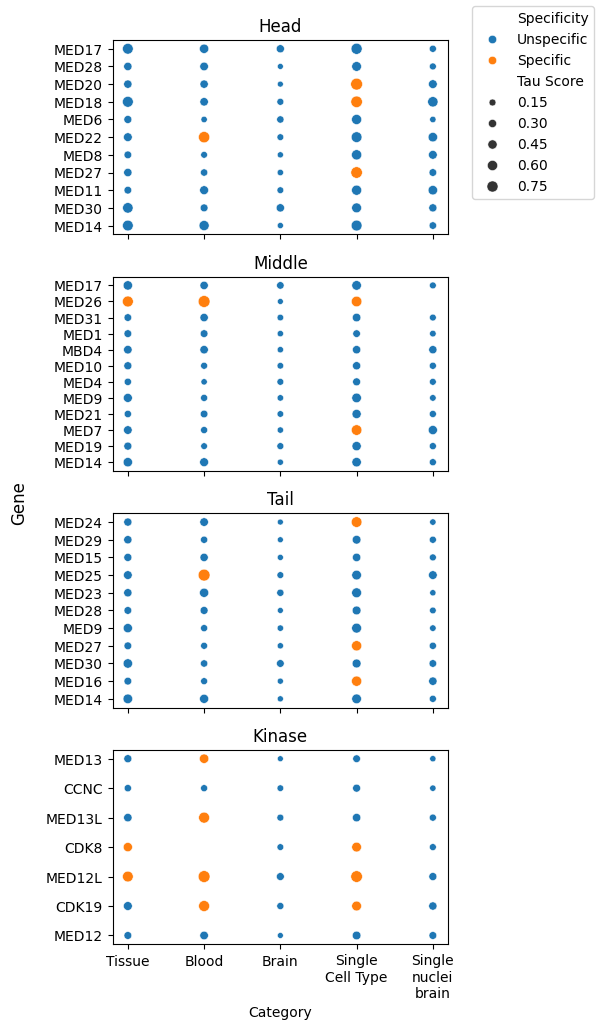

In [55]:

labellst = ["Head", "Middle", "Tail", "Kinase"]

fig, axs = plt.subplots(len(labellst), figsize = (6, 10), sharex=True)
fig.supylabel("Gene")

for label_i in range(len(labellst)):
    label = labellst[label_i]
    module = get_module(label)
    moduleplt = meltmodule(module)
    sns.scatterplot(moduleplt, y = "Gene", x = "Category", size = "Tau Score", hue = "Specificity", ax= axs[label_i], legend=True)
    handles, labels = axs[label_i].get_legend_handles_labels()
    axs[label_i].clear()
    sns.scatterplot(moduleplt, y = "Gene", x = "Category", size = "Tau Score", hue = "Specificity", ax= axs[label_i], legend=False)
    axs[label_i].set_ylabel('')
    axs[label_i].set_title(label)


plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Prevent overlap, leave space for legend
fig.legend(
    handles=handles,
    labels=labels,
    loc = "upper right"
)
plt.tight_layout(rect=[0, 0, 0.85, 1])
wrap_labels(axs[label_i], 10)

plt.savefig("figures/mediatorspecificity.png")


In [56]:
kinase = meltmodule(get_module("Kinase"))
kinase_specific = kinase[kinase["Specificity"] == "Specific"]
kinase_specific = scRNA_specificity[[x in kinase_specific["Gene"].unique() for x in scRNA_specificity["Gene"]]]

In [66]:
def RNAcellspecificity(df):
    df = df[["Gene", "RNA single cell type specific nTPM"]]

    cellspecific_cells = pd.DataFrame({"Cell Type": [], "Genes": []}).set_index("Cell Type")

    for _, row in df.iterrows():
        celldict = row["RNA single cell type specific nTPM"]
        if pd.notna(celldict):
            cell_dict = ast.literal_eval(celldict)
            for cell, _ in cell_dict.items():
                if cell not in cellspecific_cells.index.to_list():
                    cellspecific_cells.loc[cell] = [[]]
                cellspecific_cells.at[cell, "Genes"].append(row["Gene"])

    return cellspecific_cells

def subcomplex_RNAcellspecificity(label):
    module = meltmodule(get_module(label))
    modulespecific = module[module["Specificity"] == "Specific"]
    modulespecific = scRNA_specificity[[x in modulespecific["Gene"].unique() for x in scRNA_specificity["Gene"]]]
    return RNAcellspecificity(modulespecific)


head = subcomplex_RNAcellspecificity("Head")
middle = subcomplex_RNAcellspecificity("Middle")
tail = subcomplex_RNAcellspecificity("Tail")
kinase = subcomplex_RNAcellspecificity("Kinase")

In [67]:
head

,Genes
Cell Type,
Syncytiotrophoblasts,[MED20]
Excitatory neurons,[MED27]
Oligodendrocytes,[MED27]


In [68]:
middle

,Genes
Cell Type,
dendritic cells,[MED26]
Early spermatids,"[MED26, MED7]"
Late spermatids,"[MED26, MED7]"
Spermatocytes,"[MED26, MED7]"


In [69]:
tail

,Genes
Cell Type,
Basal respiratory cells,[MED24]
Ionocytes,[MED24]
Late spermatids,[MED25]
Excitatory neurons,[MED27]
Oligodendrocytes,[MED27]
Oocytes,[MED16]


In [70]:
kinase

,Genes
Cell Type,
Microglial cells,[MED13L]
Oligodendrocyte precursor cells,"[MED13L, CDK8, MED12L, CDK19]"
Excitatory neurons,"[CDK8, MED12L]"
Inhibitory neurons,"[CDK8, MED12L]"
Late spermatids,"[CDK8, CDK19]"
Oligodendrocytes,"[CDK8, CDK19]"
Astrocytes,[MED12L]
Prostatic glandular cells,[CDK19]
